# movie_budget_and_vote_average.ipynb

In this notebook we will explore the relationship between budget and vote_average.

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from reader import generic_reader

First we read in the movie data from `movies_prepared.csv` and see that we have 6200 movies.

In [2]:
df_movies = generic_reader.read_csv_file_to_data_frame("movie_data/movies_prepared.csv")
len(df_movies)

6200

Then we choose the columns we will work in this notebook.

In [3]:
columns_to_keep = ['movie_id', 'original_title', 'release_date', 'vote_average', 'vote_count', 'budget_2023_usd', 'revenue_2023_usd']
df_movies = df_movies[columns_to_keep].copy()
df_movies['release_date'] = pd.to_datetime(df_movies['release_date']) # Convert release_date into proper datetime objects
df_movies

,movie_id,original_title,release_date,vote_average,vote_count,budget_2023_usd,revenue_2023_usd
0,19214,Passion of Mind,2000-01-07,5.800,42,21233560,1361199
1,17908,My Dog Skip,2000-01-12,6.700,280,10616780,62900459
2,10471,Next Friday,2000-01-12,6.453,609,19464096,105862262
3,10384,Supernova,2000-01-14,4.940,409,159251699,26237745
4,10213,From Dusk Till Dawn 3: The Hangman's Daughter,2000-01-18,4.900,369,8847317,17017
...,...,...,...,...,...,...,...
6195,850165,The Iron Claw,2023-12-21,7.540,1088,15900000,40130232
6196,1025491,Freud's Last Session,2023-12-22,6.659,145,10000000,1697993
6197,994108,All of Us Strangers,2023-12-22,7.443,898,5000000,14864960
6198,823452,The Boys in the Boat,2023-12-25,7.233,311,40000000,54401583


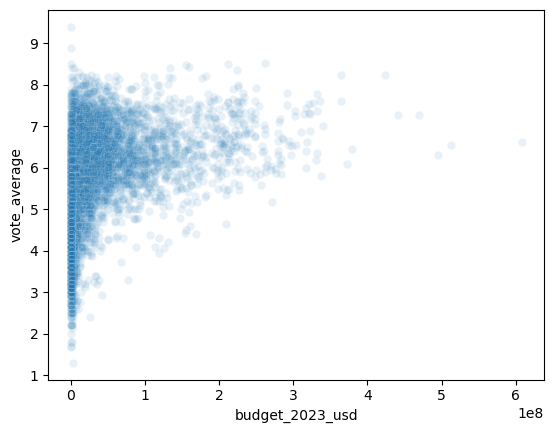

In [4]:
sns.scatterplot(x=df_movies['budget_2023_usd'], y=df_movies['vote_average'], alpha=0.1);

<Axes: xlabel='budget_2023_usd', ylabel='vote_average'>

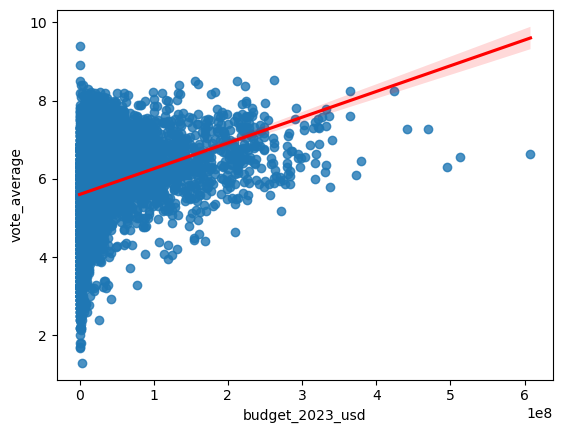

In [5]:
sns.regplot(x='budget_2023_usd', y='vote_average', data=df_movies, line_kws={'color': 'red'})

In [6]:
# Extract x and y
x = df_movies['budget_2023_usd']
y = df_movies['vote_average']

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(x, y)

# Print equation and R-value
print(f"Regression line: y = {slope:.4f}x + {intercept:.4f}")
print(f"R-value: {r_value:.4f}")

Regression line: y = 0.0000x + 5.6010
R-value: 0.3291


We do see that there is a positive correlation between movie budget and vote_average.

Although the R-value is 0.3291 so it is weak.